In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [4]:
#cargamos nuestro set de datos
data = pd.read_csv('data.csv')
data = data[data['Country/Region'].isin(['Ecuador'])]
#y = list(df.iloc [:, 1]) # Numero de casos
#obtenemos datos de los casos confirmados
infectados = list(data.iloc[:, 5])
formatoFecha = '%Y-%m-%d'
fecha = data['Date']
data['Date'] = fecha.map(lambda x: (datetime.strptime(x, formatoFecha) - datetime.strptime('2020-01-22', formatoFecha)).days)
dias = list(data['Date'])

In [5]:
def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

In [6]:
g = [100, 0.01, 200, 0.01]
n = len(dias)
y = np.empty(n)
for i in range(n):
    y[i] = reg_exponencial(dias[i], g[0], g[1], g[2], g[3])

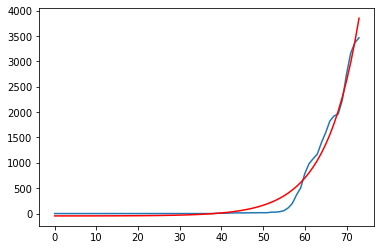

In [7]:
popt, pcov = curve_fit(reg_exponencial, dias, infectados, g)
for i in range(n):
    y[i] = reg_exponencial(dias[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(dias, infectados)
plt.plot(dias, y, 'r')